In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import qutip
import theano
import theano.tensor as T
from collections import OrderedDict
import itertools
import os
import sys

src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

from qubit_network.QubitNetwork import QubitNetwork
import qubit_network as qn
from qubit_network.net_analysis_tools import *

from utils import *

pairs = list(itertools.combinations(range(4), 2))

In [4]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['xx', 'xy', 'xz', 'yx', 'yy', 'yz', 'zx', 'zy', 'zz', 'z'])
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=200,
    batch_size=10,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Let us see how the constructed gate actually implements the toffoli.
More specifically, the optimization only assures that we are getting a gate of the form
$$ \mathcal U = \tilde{\mathcal U} \otimes P_A + (...)$$
where $P_A$ is the projector over the ancilla state that was used for the training.
This means that in the case under consideration we should have
$$ \mathcal U = \mathcal U_{toffoli} \otimes \begin{pmatrix}1&0\\0&0\end{pmatrix} + (...).$$
As shown below, this seems to be indeed the case:

In [1]:
import glob
glob.glob('../data/nets/toffoli*')

['../data/nets/toffoli_Banchietal.pickle', '../data/nets/toffoli.pickle']

# Fidelity 1 for Toffoli, with all pairwise interactions but only Z self-interactions

0.99999999989074118

<IPython.core.display.Javascript object>


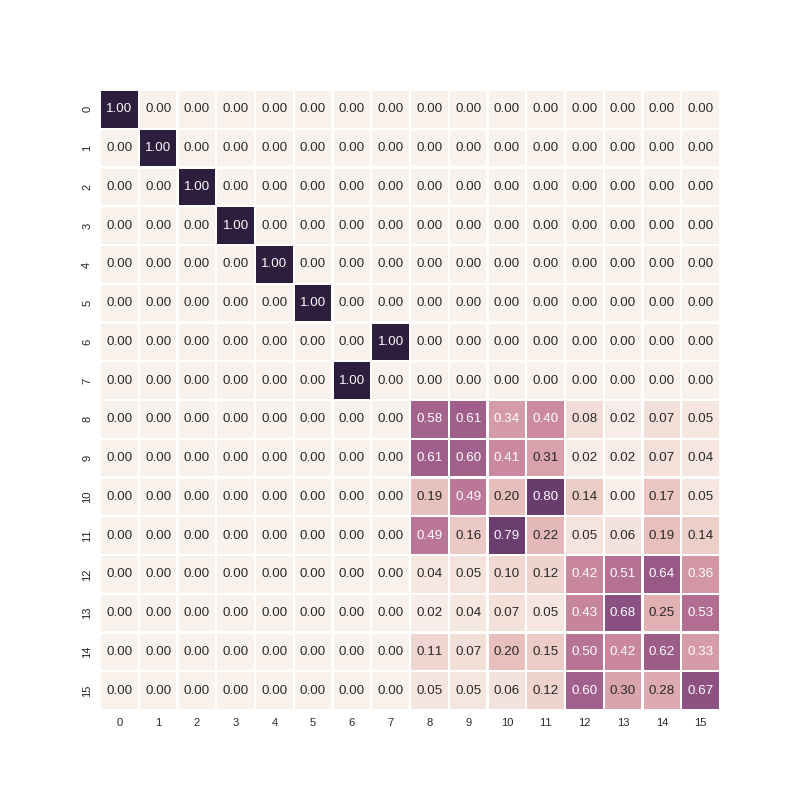

In [40]:
net = qn.load_network_from_file('../data/nets/toffoli.pickle')
display(net.test_fidelity_without_theano(n_samples=100))
plot_gate(net, permutation=[3, 0, 1, 2])

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


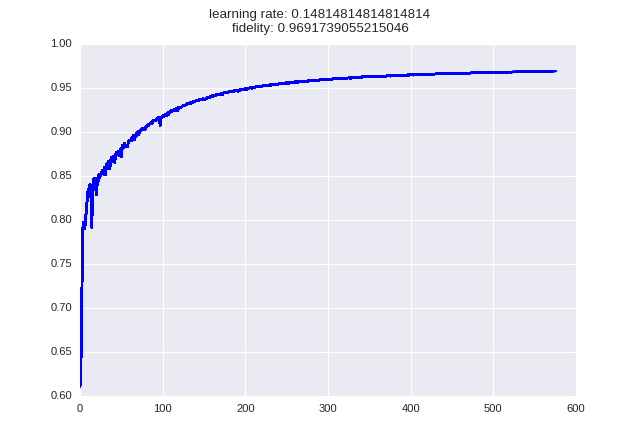

In [ ]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
)
net.J.set_value(net.J.get_value() + 10. * np.ones_like(net.J.get_value()))
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=10,
    target_gate=qutip.toffoli(),
    training_dataset_size=1000,
    test_dataset_size=100,
    decay_rate=.01
)

In [ ]:
net.save_to_file('../data/nets/toffoli_all_21070402.pickle')

True
Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


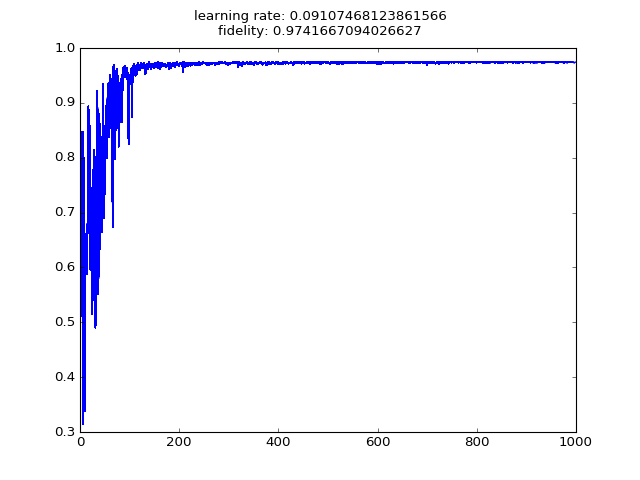

Finished training


In [2]:
interactions = [((0, 1), 'zz'), ((0, 2), 'zz'), ((0, 3), 'zz'),
                ((1, 2), 'zz'), ((1, 3), 'zz'), ((2, 3), 'zz'),
                ((0, 1), 'xz'), ((0, 2), 'xz'), ((0, 3), 'xz'),
                ((1, 2), 'xz'), ((1, 3), 'xz'), ((2, 3), 'xz'),
                ((0, 1), 'xx'), ((0, 2), 'xx'), ((1, 2), 'zz'),
                ((0, 1), 'yy'), ((0, 2), 'yy'), ((1, 2), 'yy'),
                (0, 'z'), (1, 'z'), (2, 'z'), (3, 'z')]
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=interactions,
    ancillae_state=qutip.basis(2, 0)
)

sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


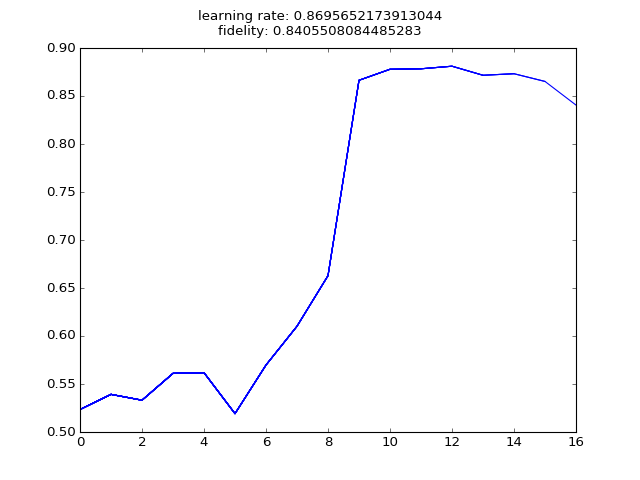

Finished training
Final fidelity: 0.7332951872566236


In [29]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['xx', 'yy', 'zz', 'x', 'z']),
    ancillae_state=qutip.basis(2, 0)
)

sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

In [30]:
print(net.test_fidelity())

0.7307879373291074


In [31]:
net.J.get_value()
# net.interactions
# net.test_fidelity()

array([ -1.47624944e+00,  -1.68671173e-03,   1.32064280e+00,
        -1.06915679e-01,   3.29860927e-01,  -9.53446131e-02,
         2.07471937e-02,  -2.61694983e+00,   1.58589806e+00,
         5.72621561e-02,  -4.86076861e-02,  -5.34661631e-02,
        -1.95254242e-01,   2.91316223e+00,   9.95461687e-02,
         6.09872104e-01,  -9.83200277e-01,   3.13767932e-02,
         2.30830666e-01,   1.46913730e+00])

In [34]:
net.J_index_to_interaction(8)
net2.tuple_to_J_index(net.J_index_to_interaction(2))

2

In [35]:
net2 = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=interactions,
    ancillae_state=qutip.basis(2, 0)
)
transfer_J_values(net, net2)
net2.J.get_value()

Setting new J values: 
[ -1.47624944e+00  -1.68671173e-03   1.32064280e+00  -1.06915679e-01
   3.29860927e-01  -9.53446131e-02   2.07471937e-02  -2.61694983e+00
   1.58589806e+00   5.72621561e-02  -4.86076861e-02  -5.34661631e-02
  -1.95254242e-01   2.91316223e+00   9.95461687e-02   6.09872104e-01
  -9.83200277e-01   3.13767932e-02   2.30830666e-01   1.46913730e+00]


array([ -1.47624944e+00,  -1.68671173e-03,   1.32064280e+00,
        -1.06915679e-01,   3.29860927e-01,  -9.53446131e-02,
         2.07471937e-02,  -2.61694983e+00,   1.58589806e+00,
         5.72621561e-02,  -4.86076861e-02,  -5.34661631e-02,
        -1.95254242e-01,   2.91316223e+00,   9.95461687e-02,
         6.09872104e-01,  -9.83200277e-01,   3.13767932e-02,
         2.30830666e-01,   1.46913730e+00])

Setting new J values: 
[ -1.47624944e+00  -1.68671173e-03   1.32064280e+00  -1.06915679e-01
   3.29860927e-01  -9.53446131e-02   2.07471937e-02  -2.61694983e+00
   1.58589806e+00   5.72621561e-02  -4.86076861e-02  -5.34661631e-02
  -1.95254242e-01   2.91316223e+00   9.95461687e-02   6.09872104e-01
  -9.83200277e-01   3.13767932e-02   2.30830666e-01   1.46913730e+00]
Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


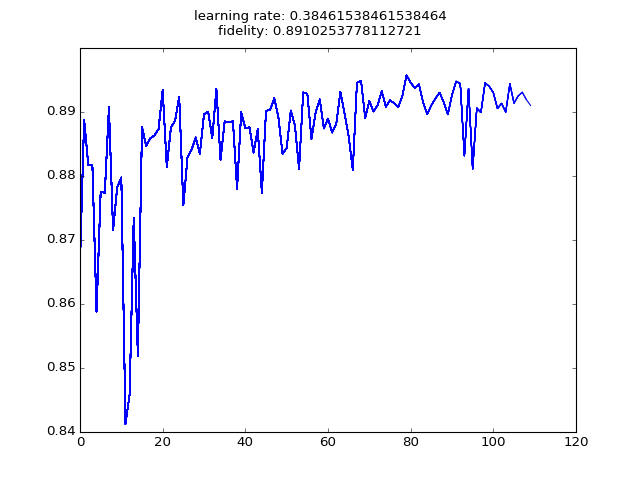

Finished training
Final fidelity: 0.9085234391014421


In [36]:
net2 = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=interactions,
    ancillae_state=qutip.basis(2, 0)
)
transfer_J_values(net, net2)
sgd_optimization(
    net=net2,
    learning_rate=.8,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

In [38]:
net2.J.get_value()

array([-1.43487411,  0.02681721,  1.3901569 , -0.06569728,  0.59210432,
       -0.02211829,  0.05041513, -2.83353115,  1.64447064,  0.08632803,
       -0.07130228, -0.08232956, -0.10494311,  3.12232157,  0.03064352,
        0.75516234, -1.03839913,  0.00365764,  0.36664539,  1.55170872])

### Test with values provided in *Banchi et al.*:

In [6]:
import glob
glob.glob('../data/nets/toffo*')

['../data/nets/toffoli_Banchietal.pickle', '../data/nets/toffoli.pickle']

<IPython.core.display.Javascript object>


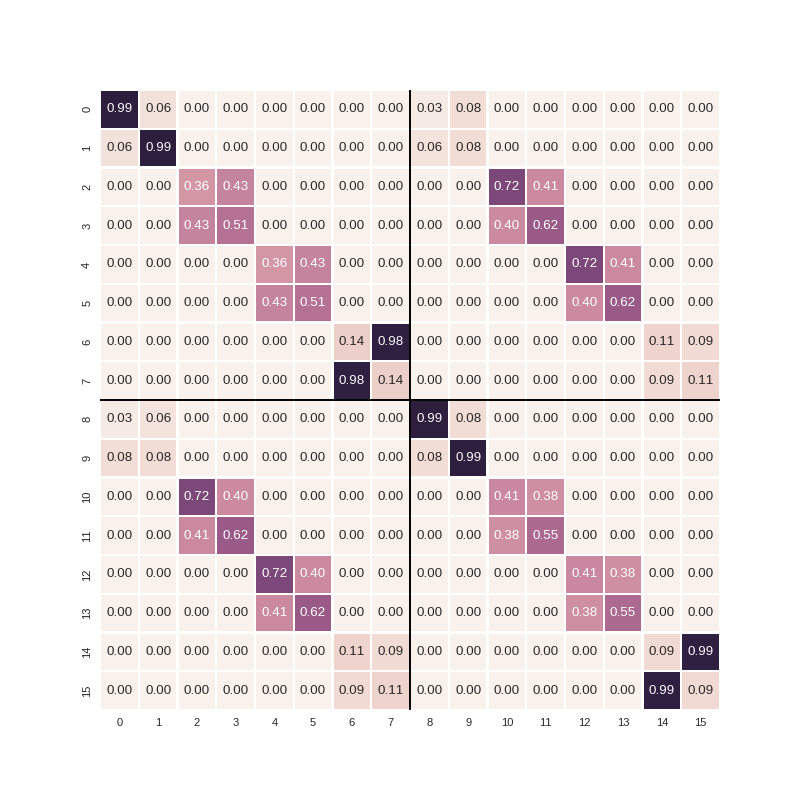

In [12]:
eta = 0.8182
xi = 0.0587
initial_ancilla = qutip.Qobj([[np.cos(eta)], [np.sin(eta) * np.exp(1j * xi)]])
# display(initial_ancilla)
net_paper = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['zz', 'xx', 'z', 'x']),
    ancillae_state=initial_ancilla,
    target_gate=qutip.toffoli()
)
net_paper.J.set_value(np.zeros_like(net_paper.J.get_value()))

Jvalues = net_paper.J.get_value()

J01zz = -8.940
J02zz = -4.957
J03zz = -5.657
J12zz = J02zz
J13zz = J03zz
h0z = -2.428
h1z = h0z
h2z = J02zz
h3z = -0.165
h2x = -19.08
h3x = -4.267
J23xx = 15.06

Jvalues[net_paper.tuple_to_J_index(((0, 1), 'zz'))] = J01zz / 4
Jvalues[net_paper.tuple_to_J_index(((0, 2), 'zz'))] = J02zz / 4
Jvalues[net_paper.tuple_to_J_index(((0, 3), 'zz'))] = J03zz / 4
Jvalues[net_paper.tuple_to_J_index(((1, 2), 'zz'))] = J12zz / 4
Jvalues[net_paper.tuple_to_J_index(((1, 3), 'zz'))] = J13zz / 4
Jvalues[net_paper.tuple_to_J_index(((2, 3), 'xx'))] = J23xx / 4
Jvalues[net_paper.tuple_to_J_index((0, 'z'))] = h0z / 2
Jvalues[net_paper.tuple_to_J_index((1, 'z'))] = h1z / 2
Jvalues[net_paper.tuple_to_J_index((2, 'z'))] = h2z / 2
Jvalues[net_paper.tuple_to_J_index((3, 'z'))] = h3z / 2
Jvalues[net_paper.tuple_to_J_index((2, 'x'))] = h2x / 2
Jvalues[net_paper.tuple_to_J_index((3, 'x'))] = h3x / 2

net_paper.J.set_value(Jvalues)

# net.test_fidelity(n_samples=1000)
# qutip.Qobj(net_paper.get_current_gate())
plot_gate(net_paper, permutation=[3, 0, 1, 2], func='abs', hvlines=[8])

In [13]:
net_paper.test_fidelity_without_theano()

0.99771061075527911

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


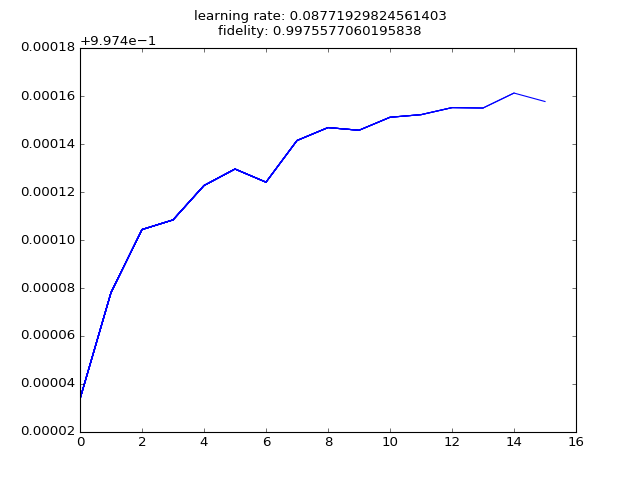

Finished training
Final fidelity: 0.9975362939367018


In [73]:
eta = 0.8182
xi = 0.0587
initial_ancilla = qutip.Qobj([[np.cos(eta)], [np.sin(eta) * np.exp(1j * xi)]])
# display(initial_ancilla)
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['zz', 'xx', 'z', 'x']),
    ancillae_state=initial_ancilla,
    target_gate=qutip.toffoli()
)
transfer_J_values(net_paper, net)
# print(isinstance(net, QubitNetwork))
sgd_optimization(
    net=net,
    learning_rate=.1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


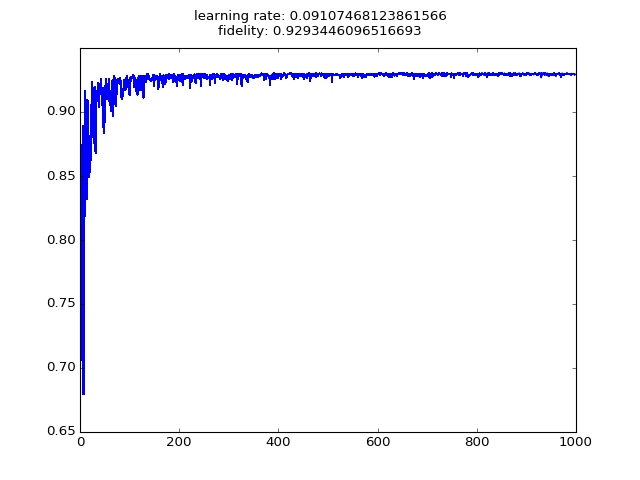

Finished training
Final fidelity: 0.9289660937046724


In [79]:
eta = 0.8182
xi = 0.0587
initial_ancilla = qutip.Qobj([[np.cos(eta)], [np.sin(eta) * np.exp(1j * xi)]])

# set up a set of interaction mimicking those of Banchi et al.
interactions = []
for pair in pairs:
    if pair != (2, 3):
        interactions.append((pair, 'zz'))
interactions.append(((2, 3), 'xx'))
for qb in range(4):
    interactions.append((qb, 'z'))
    interactions.append((qb, 'x'))

# define the network
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=interactions,
    ancillae_state=initial_ancilla,
    target_gate=qutip.toffoli()
)
net.J.set_value(np.ones_like(net.J.get_value()))

# train the network
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)